In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from LLS import LLS
from sklearn.model_selection import train_test_split

In [2]:
#Defining the function
def generate_data():
    X = np.round(np.random.uniform(0, 8 , 1000),2)
    Y = np.round (2*X + np.random.normal(0,2,1000) + 2, 1)
    return X,Y

In [3]:
X_data, Y_data = generate_data()
print(Y_data)

[10.1  4.   8.7 16.  10.3  6.7  2.4  7.9  7.4  8.5  8.4 14.5 11.4 16.8
  3.9 16.6 12.4  9.7 19.4 11.7 13.5 11.3 14.1 12.6 10.6  5.2 15.6 12.4
 11.8 14.8  2.8  5.4  8.  15.1  5.4  5.4 11.1 16.7 10.6 12.8 11.6  6.9
 11.6 11.2 15.9 17.7  4.7 12.7 13.7  8.7 15.5 12.6 11.6 16.  12.5 16.5
  4.9  3.5 -0.8 11.1 13.4 10.4  7.9  5.   6.6  2.3  3.   4.2  3.3  9.1
 11.5 13.8  9.7  4.3  4.4 12.   9.3  5.4 17.6 13.8  2.7 11.3  7.2  4.6
 15.6  9.2  9.3  9.1  3.   7.6  8.8  9.6 14.8 13.6 12.6  6.4 16.3 14.7
 12.4  6.3 14.3 15.6  9.4  1.4 10.   7.1 11.6  3.8 12.9  5.4  3.8 10.5
 14.  16.  15.5 11.6 11.8 -1.3  5.8 12.3 13.5  8.   2.6  6.2  5.6 15.7
 11.4 13.6  5.7 11.1 16.3  3.6 18.5 10.8  9.4 12.4 13.7  8.   6.4  5.4
  4.8 15.  18.2  7.7 10.6  5.   3.9  6.8 12.2  4.3  8.3  9.7  3.3  7.8
  3.8 11.9 14.  15.4  9.4  9.1 15.5  5.6 10.3 16.6 15.5 12.5 16.4 12.9
 12.2 12.7 13.2 16.   9.4  8.4  6.1 16.4  4.1 13.4  3.6  5.  12.9  4.3
 12.   5.2  5.3 10.2 15.6  1.9  8.5 12.4  2.8 17.3  5.4  2.6  8.  15.
 14.3 1

Text(0, 0.5, 'Grade')

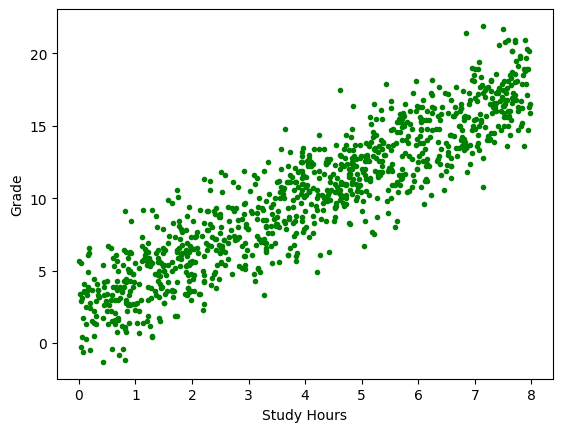

In [27]:
plt.scatter(X_data, Y_data, color= 'green', marker='.')
plt.xlabel("Study Hours")
plt.ylabel("Grade")

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [6]:
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [7]:
X_train.shape

(800, 1)

In [8]:
X_train.T.shape

(1, 800)

In [9]:
lls_model = LLS()
lls_model.fit(X_train, Y_train)
Y_pred = lls_model.predict(X_test)

In [10]:
slope, intercept, r, p, std_err = stats.linregress(X_data, Y_data)

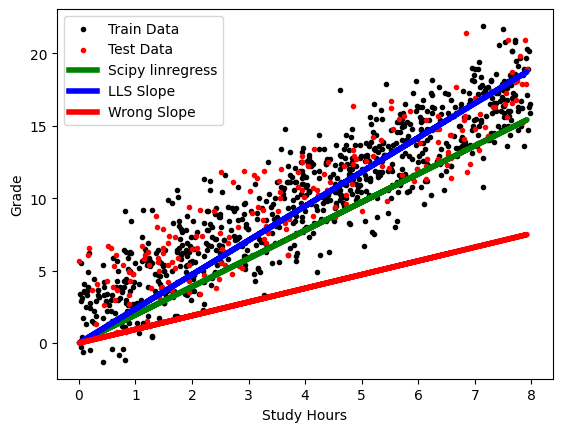

In [11]:
plt.scatter(X_train, Y_train, marker='.', color= 'k')
plt.scatter(X_test, Y_test, marker='.', color='red')
plt.plot(X_test, slope * X_test, color = 'green', linewidth= 4)
plt.plot(X_test, Y_pred, color = 'blue', linewidth= 4)
plt.plot(X_test, Y_pred * 0.4, color = 'red', linewidth = 4)
plt.xlabel("Study Hours")
plt.ylabel("Grade")
plt.legend(["Train Data", 'Test Data', 'Scipy linregress', 'LLS Slope', 'Wrong Slope'])
plt.show()